In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [5]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    "cats_vs_dogs",
    split=["train[:80%]", "train[80%:90%]", "train[90%:]"],
    with_info=True,
    as_supervised=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Лейва\tensorflow_datasets\cats_vs_dogs\4.0.0.incompleteD53Y9Q\cats_vs_dogs-train.tfrecord*.…

Dataset cats_vs_dogs downloaded and prepared to C:\Users\Лейва\tensorflow_datasets\cats_vs_dogs\4.0.0. Subsequent calls will reuse this data.


In [6]:
get_label_name = metadata.features["label"].int2str

In [8]:
def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title("Original image")
    plt.imshow(original)
    plt.axis("off")
    plt.subplot(1,2,2)
    plt.title("Augmented image")
    plt.imshow(augmented)
    plt.axis("off")

Text(0.5, 1.0, 'dog')

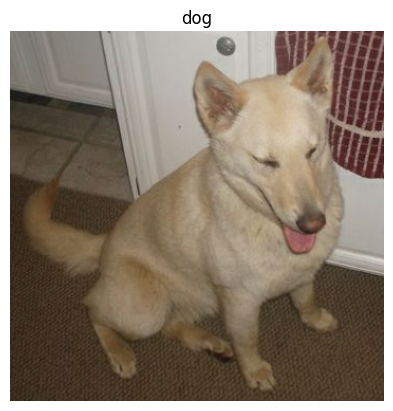

In [14]:
image, label = next(iter(test_ds))
for new_image, new_label in test_ds:
    if new_image.numpy().tolist() != image.numpy().tolist():
        image = new_image
        label = new_label
        break
plt.imshow(image)
plt.axis("off")
plt.title(get_label_name(label))

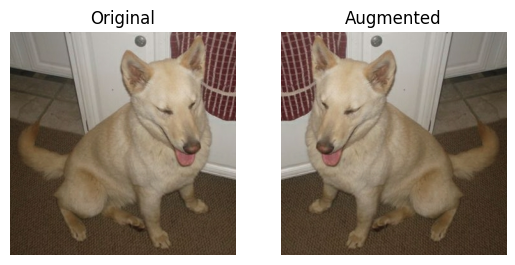

In [16]:
flipped = tf.image.flip_left_right(image)
vizualizate(image, flipped)

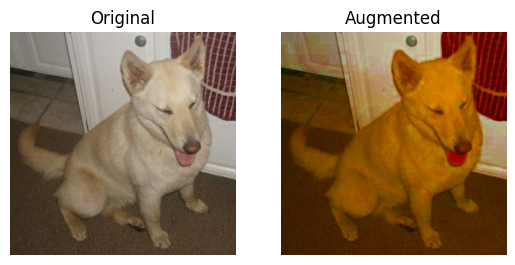

In [19]:
saturated = tf.image.adjust_saturation(image, 6)
vizualizate(image, saturated)

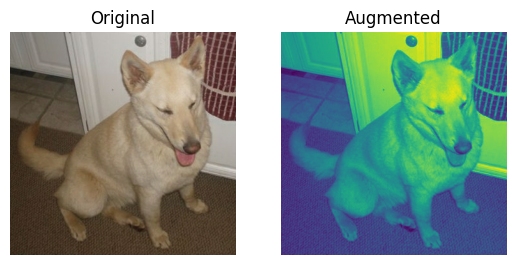

In [20]:
gray_scale = tf.image.rgb_to_grayscale(image)
vizualizate(image, gray_scale)

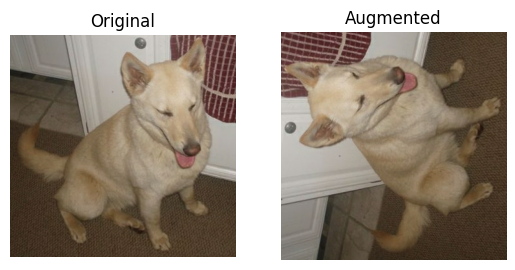

In [21]:
gray_scale = tf.image.rot90(image)
vizualizate(image, gray_scale)

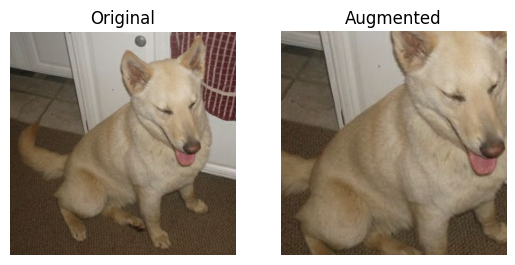

In [22]:
gray_scale = tf.image.central_crop(image, 0.7)
vizualizate(image, gray_scale)

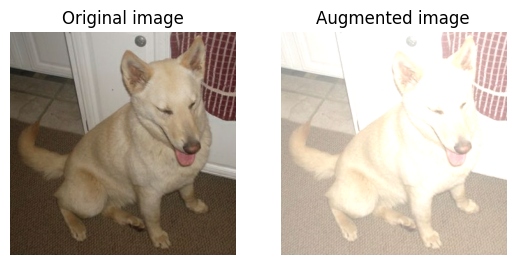

In [23]:
bright = tf.image.adjust_brightness(image, 0.5)
visualize(image, bright)

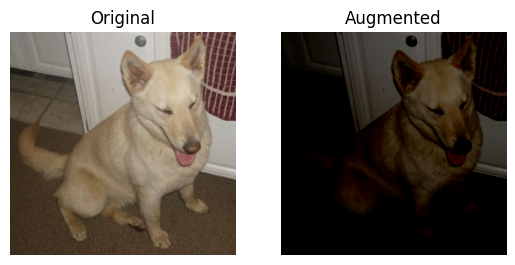

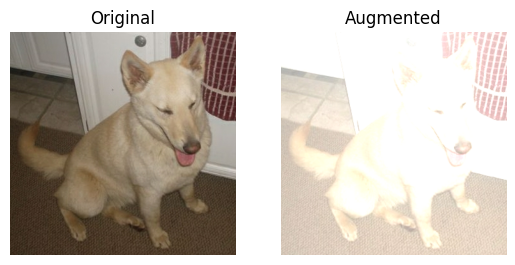

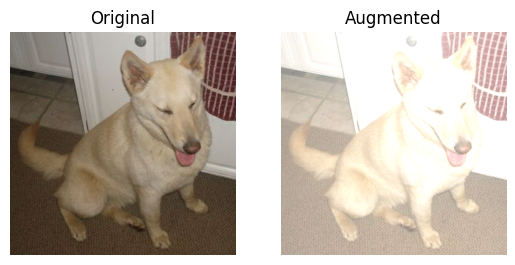

In [24]:
for i in range (3):
    seed = (i, 0)
    st_rand_bright = tf.image.stateless_random_brightness(image, max_delta=0.8, seed=seed)
    vizualizate(image, st_rand_bright)